In [146]:
#Erick Jair Cisneros Hinojosa 1768238
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

col_names = ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR',
          'CGPA', 'Research', 'Chance_of_Admit']
df = pd.read_csv('Admission_Predict_Ver1.1.csv', header=None, names=col_names)
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [147]:
arreglox = df.drop('Research', axis=1)
arregloy = df['Research']

In [148]:
arreglox

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,0.92
1,2,324,107,4,4.0,4.5,8.87,0.76
2,3,316,104,3,3.0,3.5,8.00,0.72
3,4,322,110,3,3.5,2.5,8.67,0.80
4,5,314,103,2,2.0,3.0,8.21,0.65
5,6,330,115,5,4.5,3.0,9.34,0.90
6,7,321,109,3,3.0,4.0,8.20,0.75
7,8,308,101,2,3.0,4.0,7.90,0.68
8,9,302,102,1,2.0,1.5,8.00,0.50
9,10,323,108,3,3.5,3.0,8.60,0.45


In [149]:
arregloy

0      1
1      1
2      1
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     1
15     0
16     0
17     1
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     0
27     1
28     0
29     0
      ..
470    1
471    0
472    1
473    0
474    1
475    0
476    0
477    0
478    1
479    1
480    1
481    1
482    1
483    0
484    1
485    1
486    0
487    0
488    1
489    0
490    1
491    0
492    1
493    1
494    1
495    1
496    1
497    1
498    0
499    0
Name: Research, Length: 500, dtype: int64

In [128]:
le_Serial_No = LabelEncoder()

In [150]:
arreglox['Serial_No_n'] = le_Serial_No.fit_transform(arreglox['Serial_No'])
arreglox['GRE_Score_n'] = le_Serial_No.fit_transform(arreglox['GRE_Score'])
arreglox['TOEFL_Score_n'] = le_Serial_No.fit_transform(arreglox['TOEFL_Score'])
arreglox['University_Rating_n'] = le_Serial_No.fit_transform(arreglox['University_Rating'])
arreglox['SOP_n'] = le_Serial_No.fit_transform(arreglox['SOP'])
arreglox['LOR_n'] = le_Serial_No.fit_transform(arreglox['LOR'])
arreglox['CGPA_n'] = le_Serial_No.fit_transform(arreglox['CGPA'])
arreglox['Chance_of_Admit_n'] = le_Serial_No.fit_transform(arreglox['Chance_of_Admit'])
arreglox.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Serial_No_n,GRE_Score_n,TOEFL_Score_n,University_Rating_n,SOP_n,LOR_n,CGPA_n,Chance_of_Admit_n
0,1,337,118,4,4.5,4.5,9.65,0.92,0,45,26,3,7,7,170,55
1,2,324,107,4,4.0,4.5,8.87,0.76,1,32,15,3,6,7,112,39
2,3,316,104,3,3.0,3.5,8.00,0.72,2,24,12,2,4,5,41,35
3,4,322,110,3,3.5,2.5,8.67,0.80,3,30,18,2,5,3,94,43
4,5,314,103,2,2.0,3.0,8.21,0.65,4,22,11,1,2,4,58,28


In [130]:
arreglox_n = arreglox.drop(['Serial_No','GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit'], axis=1)
arreglox_n.head()

,Serial_No_n,GRE_Score_n,TOEFL_Score_n,University_Rating_n,SOP_n,LOR_n,CGPA_n,Chance_of_Admit_n
0,0,45,26,3,7,7,170,55
1,1,32,15,3,6,7,112,39
2,2,24,12,2,4,5,41,35
3,3,30,18,2,5,3,94,43
4,4,22,11,1,2,4,58,28


In [151]:
X_train, X_test, y_train, y_test = train_test_split(arreglox_n, arregloy, test_size=0.3, random_state=1)

In [152]:
clf = DecisionTreeClassifier()

In [153]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 75.33333333333333 %


In [155]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

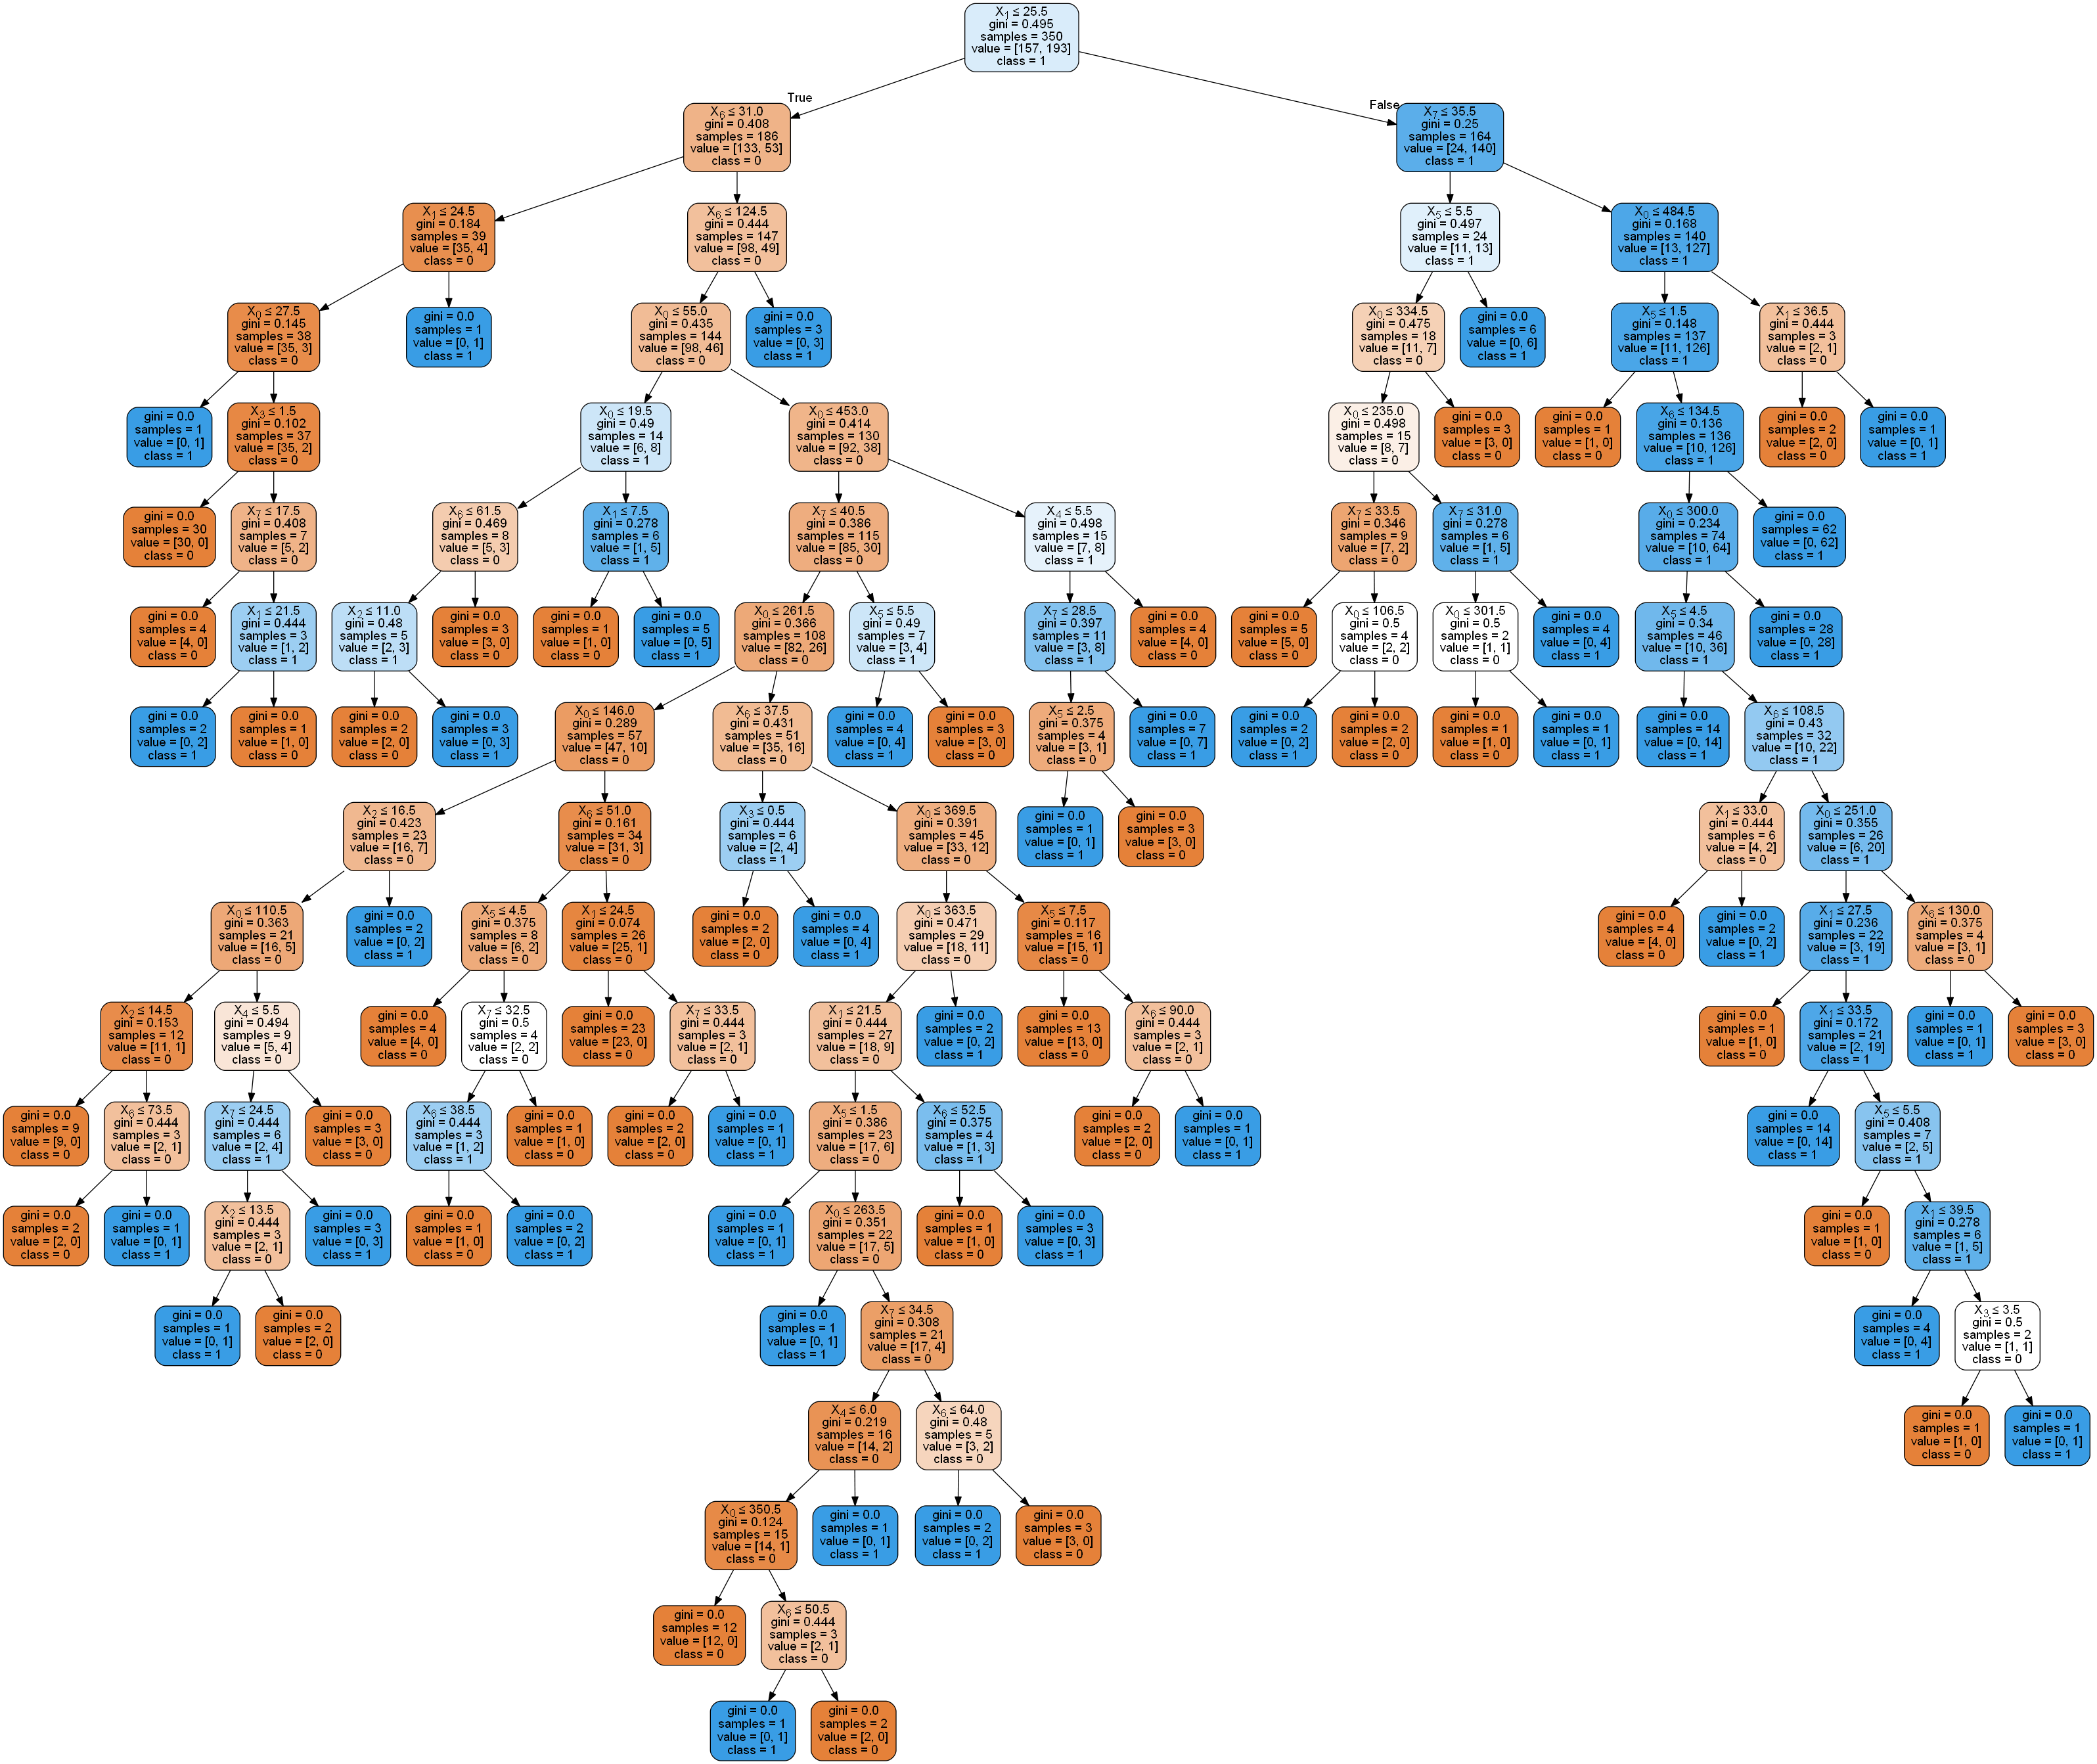

In [138]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Admission_Predict_Ver1.1.png')
Image(graph.create_png())

In [157]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 76.66666666666667 %


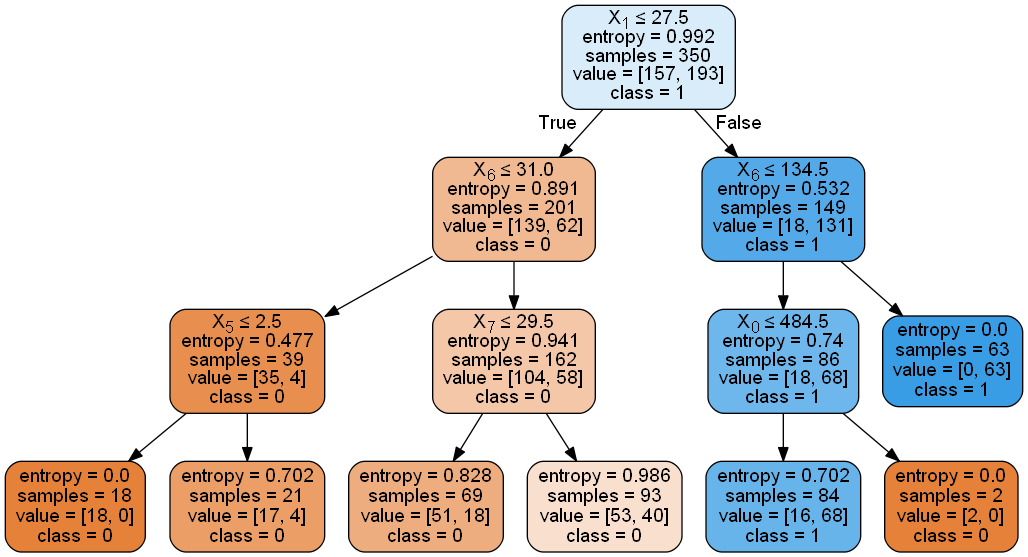

In [158]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Admission_Predict_Ver1.1.png')
Image(graph.create_png())